In [54]:
from dice import Dice
from character import AbilityScore, Weapon, Character, Damage
from xanthos import Xanthos
from misha import Misha
from sheraz import Sheraz

In [53]:
results = []
for i in range(1000):
    roll = Dice.advantage(Dice.d20)
    results.append((roll, Dice.isCritSuccess(roll)))
    #print(roll, Dice.isCritSuccess(roll))
print(len([val for val in results if val[1] == True]) / len(results) * 100, "%")

With advantage, rolled 14 from [14, 4] with d20
With advantage, rolled 16 from [6, 16] with d20
With advantage, rolled 14 from [2, 14] with d20
With advantage, rolled 17 from [17, 5] with d20
With advantage, rolled 20 from [3, 20] with d20
With advantage, rolled 15 from [15, 3] with d20
With advantage, rolled 10 from [2, 10] with d20
With advantage, rolled 10 from [2, 10] with d20
With advantage, rolled 9 from [7, 9] with d20
With advantage, rolled 6 from [6, 4] with d20
With advantage, rolled 19 from [9, 19] with d20
With advantage, rolled 18 from [6, 18] with d20
With advantage, rolled 14 from [2, 14] with d20
With advantage, rolled 16 from [16, 6] with d20
With advantage, rolled 17 from [17, 9] with d20
With advantage, rolled 3 from [3, 2] with d20
With advantage, rolled 20 from [4, 20] with d20
With advantage, rolled 20 from [20, 15] with d20
With advantage, rolled 20 from [19, 20] with d20
With advantage, rolled 20 from [14, 20] with d20
With advantage, rolled 13 from [9, 13] with

In [ ]:
# Xanthos Damage Mode Samples
xanthos = Xanthos()
print(xanthos.weapon)
print(xanthos.ability)
print(xanthos.attack_modifier(xanthos.weapon))
no_eldritch = xanthos.full_attack_action()
print(no_eldritch)
Damage.damage(no_eldritch, 13)
xanthos.eldritch()
print(xanthos.weapon)
eldritch = xanthos.full_attack_action()
print(eldritch)
Damage.damage(eldritch, 13)

In [52]:
# Misha Damage Mode Samples
misha = Misha()
print(misha.weapon)
print(misha.ability)
print(misha.attack_modifier(misha.weapon))
no_rage = misha.full_attack_action()
print(no_rage)
Damage.damage(no_rage, 13)
gw_no_rage = misha.great_weapon_attack_action()
print(gw_no_rage)
Damage.damage(gw_no_rage, 13)
misha.rage()
print(misha.weapon)
rage = misha.full_attack_action()
print(rage)
Damage.damage(rage, 13)
gw_rage = misha.great_weapon_attack_action()
print(gw_rage)
Damage.damage(gw_rage, 13)

Weapon {'attack': 1, 'damage': 1, 'roll': ['d10']}
Abilities {'proficiency': 3, 'strength': 20, 'dexterity': 12, 'constitution': 15, 'intelligence': 9, 'wisdom': 13, 'charisma': 10}
Modifiers{'STR': 5, 'DEX': 1, 'CON': 2, 'INT': -1, 'WIS': 1, 'CHA': 0}
9
Attack roll 17 9
Rolled 7 from [(7, 'd10')]
Attack Damage 7 6
Attack roll 16 9
Rolled 1 from [(1, 'd10')]
Attack Damage 1 6
[Damage {'attack roll': 26, 'attack damage': 13}, Damage {'attack roll': 25, 'attack damage': 7}]
2 / 2 hits for 20 damage on creature with ac 13
Attack roll 13 4
Rolled 4 from [(4, 'd10')]
Attack Damage 4 16
Attack roll 9 4
Rolled 10 from [(10, 'd10')]
Attack Damage 10 16
[Damage {'attack roll': 17, 'attack damage': 20}, Damage {'attack roll': 13, 'attack damage': 26}]
2 / 2 hits for 46 damage on creature with ac 13
Weapon {'attack': 1, 'damage': 3, 'roll': ['d10']}
Attack roll 9 9
Rolled 6 from [(6, 'd10')]
Attack Damage 6 8
Attack roll 7 9
Rolled 10 from [(10, 'd10')]
Attack Damage 10 8
[Damage {'attack roll': 

27

In [ ]:
acs = range(13, 25)
damages = {}
for ac in acs:
    damages[ac] = []
xanthos = Xanthos()
xanthos.eldritch()
for i in range(1000):
    eldritch = xanthos.full_attack_action()
    for ac in acs:
        damages[ac].append(Damage.damage(eldritch, ac))

In [57]:
# Normal is 0, Advantage is 1, Disadvantage is -1
adv = 0
sim_count = 1000
acs = range(13, 25)
x_damages = {}
m_damages = {}
s_damages = {}
for ac in acs:
    x_damages[ac] = []
    m_damages[ac] = []
    s_damages[ac] = []
misha = Misha()
misha.rage()
xanthos = Xanthos()
xanthos.eldritch()
sheraz = Sheraz()
for i in range(sim_count):
    rage = misha.frenzy_full_attack_action(adv=adv)
    gw_rage = misha.frenzy_gw_full_attack_action(adv=adv)
    eldritch = xanthos.full_attack_action(adv=adv)
    sneaky = sheraz.full_attack_action(adv=adv)
    for ac in acs:
        if ac <=18:
            m_damages[ac].append(Damage.damage(gw_rage, ac))
        else:
            m_damages[ac].append(Damage.damage(rage, ac))
        x_damages[ac].append(Damage.damage(eldritch, ac))
        s_damages[ac].append(Damage.damage(sneaky, ac))

Attack roll 16 9
Rolled 6 from [(6, 'd10')]
Attack Damage 6 8
Attack roll 6 9
Rolled 2 from [(2, 'd10')]
Attack Damage 2 8
Attack roll 8 9
Rolled 6 from [(6, 'd10')]
Attack Damage 6 8
Attack roll 19 4
Rolled 2 from [(2, 'd10')]
Attack Damage 2 18
Attack roll 4 4
Rolled 6 from [(6, 'd10')]
Attack Damage 6 18
Attack roll 17 4
Rolled 1 from [(1, 'd10')]
Attack Damage 1 18
Attack roll 17 8
Rolled 7 from [(5, 'd6'), (2, 'd6')]
Attack Damage 7 5
Attack roll 17 8
Rolled 5 from [(4, 'd6'), (1, 'd6')]
Attack Damage 5 5
Attack roll 1 8
Rolled 5 from [(2, 'd6'), (3, 'd6')]
Attack Damage 5 5
Attack roll 5 8
Rolled 11 from [(6, 'd6'), (5, 'd6')]
Attack Damage 11 5
Attack roll 3 7
Rolled 4 from [(4, 'd8')]
Attack Damage 4 4
Attack roll 2 8
Rolled 15 from [(4, 'd6'), (4, 'd6'), (5, 'd6'), (2, 'd6')]
Attack Damage 15 5
2 / 3 hits for 39 damage on creature with ac 13
3 / 4 hits for 38 damage on creature with ac 13
0 / 2 hits for 0 damage on creature with ac 13
2 / 3 hits for 39 damage on creature with 

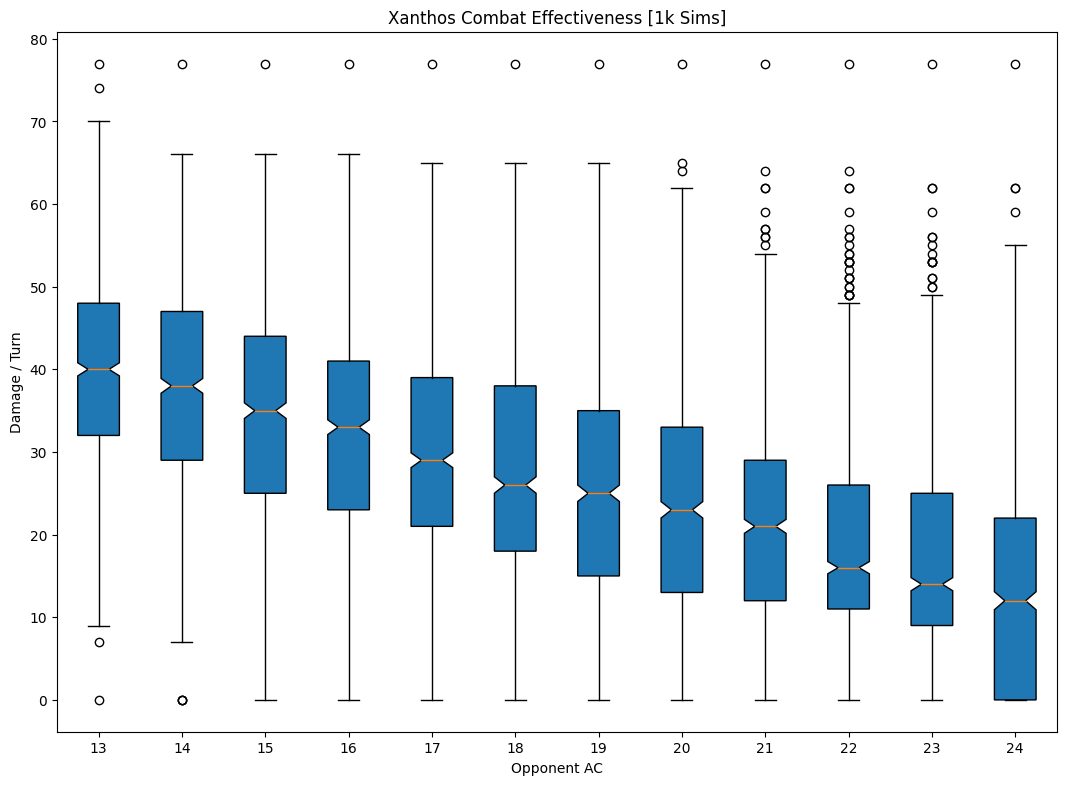

In [55]:
!!pip install matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot([x_damages[ac] for ac in acs], patch_artist = True,
                notch ='True')
ax.set_xticklabels(acs)
ax.set_xlabel("Opponent AC")
ax.set_ylabel("Damage / Turn")
plt.title("Xanthos Combat Effectiveness [1k Sims]")
plt.show()

In [56]:
print("Xanthos", [(ac, sum(x_damages[ac])/len(x_damages[ac])) for ac in acs])
print("Sheraz", [(ac, sum(s_damages[ac])/len(s_damages[ac])) for ac in acs])
print("Misha", [(ac, sum(m_damages[ac])/len(m_damages[ac])) for ac in acs])

Xanthos [(13, 39.598), (14, 37.244), (15, 34.73), (16, 32.388), (17, 29.889), (18, 27.698), (19, 25.72), (20, 23.625), (21, 21.072), (22, 18.734), (23, 16.694), (24, 14.054)]
Sheraz [(13, 22.262), (14, 20.903), (15, 19.659), (16, 18.181), (17, 16.695), (18, 15.413), (19, 14.032), (20, 12.829), (21, 11.492), (22, 10.25), (23, 8.84), (24, 7.442)]
Misha [(13, 43.422), (14, 40.112), (15, 36.612), (16, 32.928), (17, 29.546), (18, 26.14), (19, 22.689), (20, 20.94), (21, 18.732), (22, 16.689), (23, 14.468), (24, 12.588)]


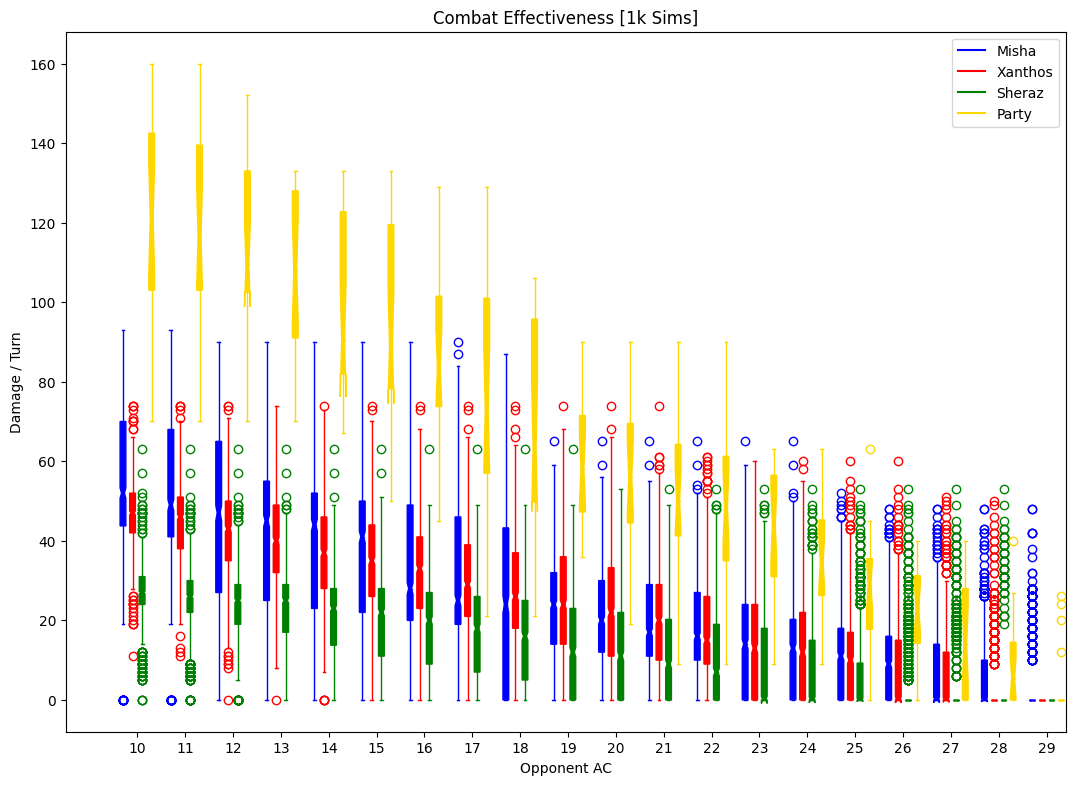

In [49]:
!!pip install matplotlib, pylab
from pylab import plot, show, savefig, xlim, figure, \
    ylim, legend, boxplot, setp, axes


def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
    setp(bp['fliers'][0], markeredgecolor='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
    setp(bp['fliers'][1], markeredgecolor='red')
    setp(bp['medians'][1], color='red')

    setp(bp['boxes'][2], color='green')
    setp(bp['caps'][4], color='green')
    setp(bp['caps'][5], color='green')
    setp(bp['whiskers'][4], color='green')
    setp(bp['whiskers'][5], color='green')
    setp(bp['fliers'][2], markeredgecolor='green')
    setp(bp['medians'][2], color='green')

    setp(bp['boxes'][3], color='gold')
    setp(bp['caps'][6], color='gold')
    setp(bp['caps'][7], color='gold')
    setp(bp['whiskers'][6], color='gold')
    setp(bp['whiskers'][7], color='gold')
    setp(bp['fliers'][3], markeredgecolor='gold')
    setp(bp['medians'][3], color='gold')

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
#hold(True)
i = 1
for ac in acs:
    bp = ax.boxplot([m_damages[ac], x_damages[ac], s_damages[ac], [m_damages[ac][j] + x_damages[ac][j] + s_damages[ac][j] for j in range(len(m_damages))]], positions = [i, i+1, i+2, i+3], widths = 0.6, patch_artist = True,
                    notch ='True')
    setBoxColors(bp)
    i = i + 5

ax.set_xticks([5*d + 2.5 for d in range(len(acs))])
ax.set_xticklabels([str(ac) for ac in acs])
ax.set_xlabel("Opponent AC")
ax.set_ylabel("Damage / Turn")
plt.title("Combat Effectiveness [1k Sims]")

# draw temporary red blue, and green lines and use them to create a legend
hB, = plot([1,1],'b-')
hR, = plot([1,1],'r-')
hG, = plot([1,1],'g-')
hAu, = plot([1,1],c='gold')
plt.legend((hB, hR, hG, hAu),('Misha', 'Xanthos', 'Sheraz', 'Party'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)
hAu.set_visible(False)

plt.show()

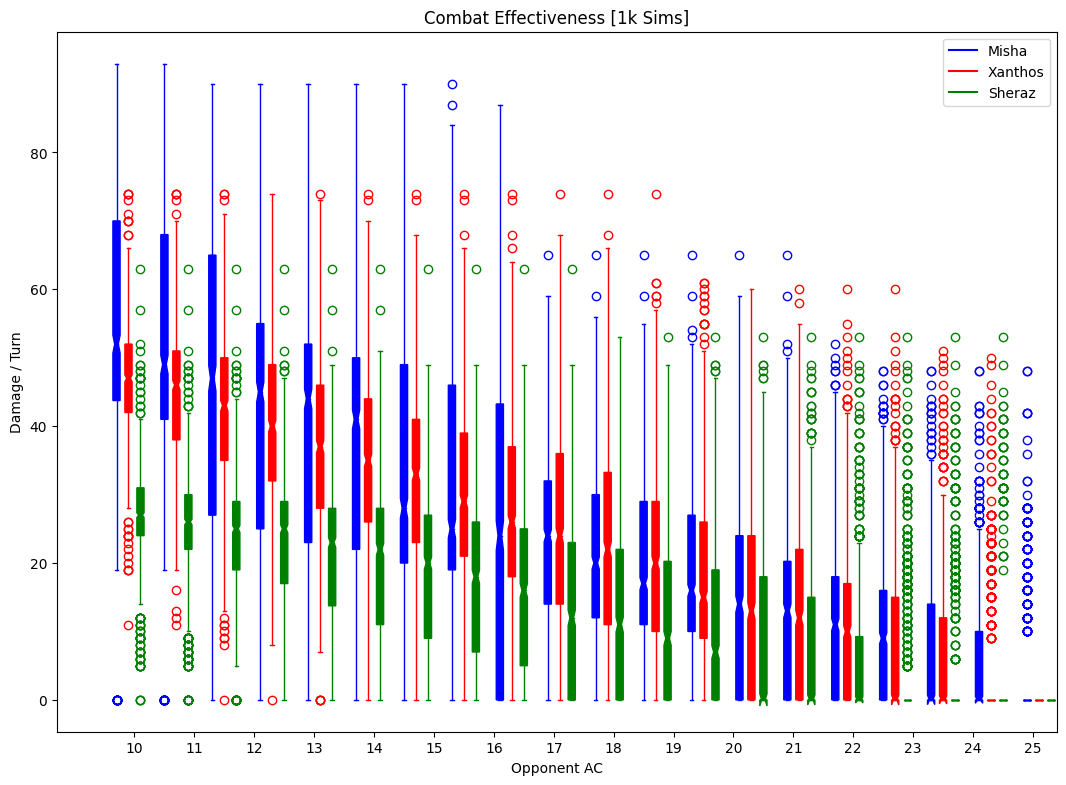

In [50]:
!!pip install matplotlib, pylab
from pylab import plot, show, savefig, xlim, figure, \
    ylim, legend, boxplot, setp, axes


def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
    setp(bp['fliers'][0], markeredgecolor='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
    setp(bp['fliers'][1], markeredgecolor='red')
    setp(bp['medians'][1], color='red')

    setp(bp['boxes'][2], color='green')
    setp(bp['caps'][4], color='green')
    setp(bp['caps'][5], color='green')
    setp(bp['whiskers'][4], color='green')
    setp(bp['whiskers'][5], color='green')
    setp(bp['fliers'][2], markeredgecolor='green')
    setp(bp['medians'][2], color='green')

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
#hold(True)
i = 1
for ac in acs:
    bp = ax.boxplot([m_damages[ac], x_damages[ac], s_damages[ac]], positions = [i, i+1, i+2], widths = 0.6, patch_artist = True,
                    notch ='True')
    setBoxColors(bp)
    i = i + 4

ax.set_xticks([5*d + 2.5 for d in range(len(acs))])
ax.set_xticklabels([str(ac) for ac in acs])
ax.set_xlabel("Opponent AC")
ax.set_ylabel("Damage / Turn")
plt.title("Combat Effectiveness [1k Sims]")

# draw temporary red blue, and green lines and use them to create a legend
hB, = plot([1,1],'b-')
hR, = plot([1,1],'r-')
hG, = plot([1,1],'g-')
plt.legend((hB, hR, hG),('Misha', 'Xanthos', 'Sheraz'))
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

plt.show()